<a href="https://colab.research.google.com/github/vishalikabondre-design/Internship/blob/main/WE_INTERN_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICT HOUSE PRICES USING MACHINE LEARNING
Description: Train a regression model to predict house prices using the classic Boston Housing dataset or a similar dataset from Kaggle.
Challenges:Feature scaling and encoding categorical data Train/test split and evaluate model using RMSE or R² Visualize model performance and key features
Tech Stack: Python, Pandas, NumPy, Scikit-learn,


Dataset Shape: (10000, 5)
   square_feet  num_rooms  age  distance_to_city(km)          price
0  2248.357077          3   92             22.997972  200374.090410
1  1930.867849          2   22             13.984254  268784.847337
2  2323.844269          6   33             21.500945  315020.857676
3  2761.514928          3   63             10.343638  355111.468459
4  1882.923313          7   54             25.485200  234197.123903

Model Performance Metrics
MAE  : 15596.1205
MSE  : 386443817.4603
RMSE : 19658.1743
R²   : 0.9601
MAPE : 15.10%
MSLE : 0.2897


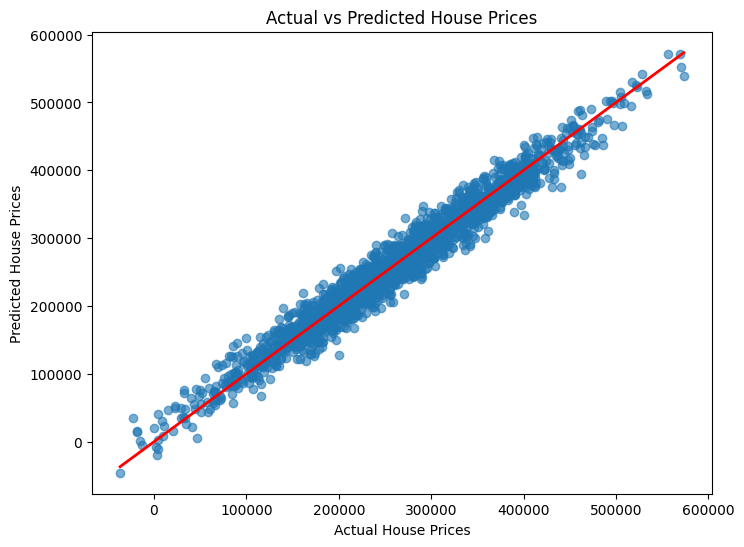

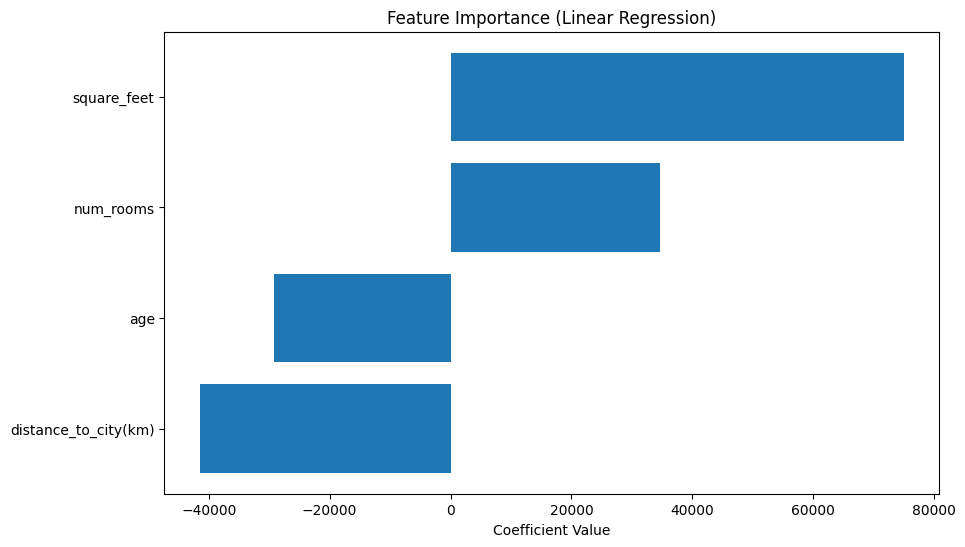

In [ ]:
# House Price Prediction using Machine Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error
)

# Load Dataset
df = pd.read_csv("/content/house_prices_dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())


# Define Features & Target
# CHANGE THIS if your target column name is different
target_column = "price"

X = df.drop(columns=[target_column])
y = df[target_column]

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Avoid negative values for MSLE & MAPE
y_test_safe = np.maximum(y_test, 1)
y_pred_safe = np.maximum(y_pred, 1)

msle = mean_squared_log_error(y_test_safe, y_pred_safe)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nModel Performance Metrics")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"MSLE : {msle:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2
)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Feature Importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.gca().invert_yaxis()
plt.show()
